# CO DÃN DỮ LIỆU VỚI SCIKIT-LEARN

Co dãn dữ liệu (scaling) là một bước trong tiền xử lý dữ liệu được áp dụng cho các biến số độc lập. Các biến số  của tập dữ liệu luôn có các tính chất khác nhau về đơn vị, phạm vi và phân phối trong khi một số thuật toán sử dụng khoảng cách giữa các điểm (l1 - Manhattan, l2 -  Euclidean) để ước lượng các tham số: K-Mean, KNN, ... Việc khác nhau về đơn của các biến số gây cho sự đóng góp vào khoảng cách khác nhau giữa các biến số, biến số có phạm vi lớn hơn sẽ đóng góp nhiều hơn dẫn đến chiếm ưu thế hơn, làm cho công cụ dự đoán không thể học được từ các biến số khác. Vì vậy các biến số cần được đưa về cùng một thang đo, ta dùng các phép co dãn dữ liệu để thực hiện việc này.  
Co giãn dữ liệu về các thang đo nhỏ hơn cũng giúp thuật toán tính toán nhanh hơn.

In [1]:
# Sử dụng bộ dữ liệu iris để ví dụ
import pandas as pd
import numpy as np
iris= pd.read_csv('data/iris.csv')

## 1. Phép co dãn min max  
Thực hiện chuyển đổi các biến số định lượng đến một khoảng nhất định (thông thường là 0 - 1).  
Công thức như sau:  
$X_j= \frac{X_i - min}{max - min} \times (max_{new} - min_{new}) + min_{new}$  
- $X_i$: Các giá trị của biến x trước khi scale.
- $X_j$: Các giá trị của biến x sau khi scale.
- max: Giá trị lớn nhất của biến x trước khi scale.
- min: Giá trị nhỏ nhất của biến x trước khi scale.
- $min_{new}$: Giá trị nhỏ nhất của biến x sau khi scale
- $max_{new}$: Giá trị lớn nhất của biến x sau khi scale

In [2]:
# Vẽ biểu đồ để so sánh
import matplotlib.pyplot as plt
import seaborn as sns
def make_plot(data_scaled):
    columns= ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
    sns.set_style("darkgrid")
    fig = plt.figure(figsize= (13, 6))
    plt.subplot(1, 2, 1)
    plt.title('Before Scaling')
    for col in columns:
        sns.kdeplot(data_scaled[col])
    plt.subplot(1, 2, 2)
    plt.title('After Scaling')
    for col in columns:
        sns.kdeplot(data_scaled[col + '_scaled'])

Đưa biến số sepal_length về thang đo mới có giá trị nằm trong khoảng 0 - 1

In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

minmax_scaler= MinMaxScaler(feature_range= (0, 1))
columns= ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
minmax_transformer= ColumnTransformer(transformers= [('minmax scale', minmax_scaler, columns)])

data_minmax_scaled= minmax_transformer.fit_transform(iris)
data_minmax_scaled= pd.DataFrame(data_minmax_scaled, columns= [col + '_scaled' for col in columns])
data_minmax_scaled= data_minmax_scaled.join(iris)

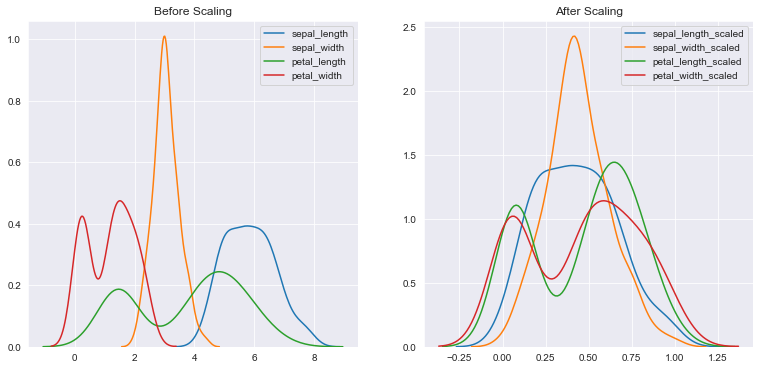

In [4]:
make_plot(data_minmax_scaled)

## 2. Phép co dãn max abs  
Thực hiện chuyển đổi các biến số định lượng đến thang đo trong khoảng -1 đến 1.  
Công thức như sau:
$X_j= \frac{X_i + max_{abs}}{2 max_{abs}} \times 2 - 1$    

- $X_i$: Các giá trị của biến x trước khi scale.
- $X_j$: Các giá trị của biến x sau khi scale.
- $max_{abs}$: Giá trị tuyệt đối lớn nhất của biến x

In [5]:
from sklearn.preprocessing import MaxAbsScaler
from sklearn.compose import ColumnTransformer

columns= ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
maxabs_scaler = MaxAbsScaler()
maxabs_transformer= ColumnTransformer([('Max Abs scale', maxabs_scaler, columns)])

data_maxabs_scaled= maxabs_transformer.fit_transform(iris)
data_maxabs_scaled= pd.DataFrame(data_maxabs_scaled, columns= [col + '_scaled' for col in columns])
data_maxabs_scaled= data_maxabs_scaled.join(iris)

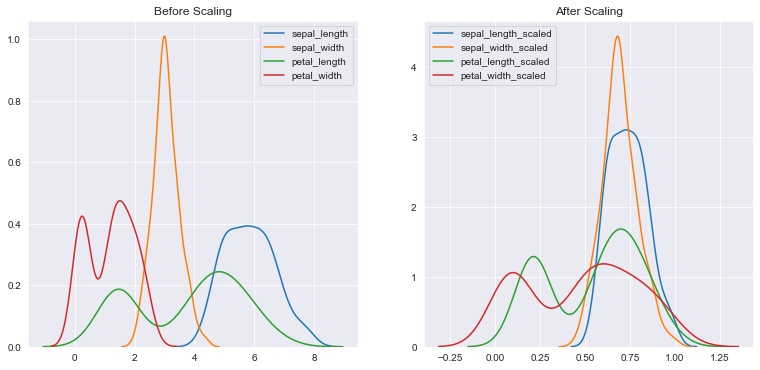

In [6]:
make_plot(data_maxabs_scaled)

## 3. Phép co dãn tiêu chuẩn hóa  
Phép co dãn này chuyển các biến số về dạng tiêu chuẩn với trung bình bằng 0 và đơn vị bằng 1 độ lệch chuẩn (chỉ số z). Phép co dãn này có thể hoạt động không tốt nếu biến số có phân phối không giống với phân phối bình thường.  
Công thức như sau:  
$z= \frac{X - mean}{sd}$  
- $X$: Các giá trị của biến x trước khi scale.
- $z$: Các giá trị của biến x sau khi scale.
- mean: Giá trị trung bình của biến x trước khi scale.
- sd: Độ lệch chuẩn của biến x trước khi scale.

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

columns= ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
standard_scaler= StandardScaler()
standard_transformer= ColumnTransformer(transformers= [('Standard scale', standard_scaler, columns)])

data_standard_scaled= standard_transformer.fit_transform(iris)
data_standard_scaled= pd.DataFrame(data_standard_scaled, columns= [col + '_scaled' for col in columns])
data_standard_scaled= data_standard_scaled.join(iris)

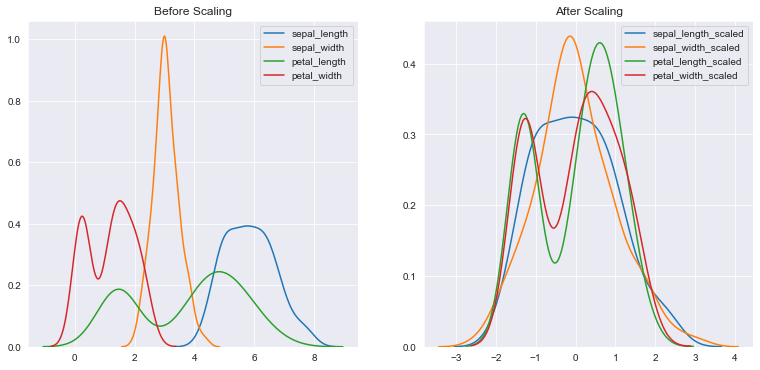

In [8]:
make_plot(data_standard_scaled)

## 4. Phép co dãn Robus

Phép co dãn Robus sử dụng phương pháp tính toán tương tự như phép co dãn min max tuy nhiên phép co dãn này sử dụng phạm vi là khoảng phân vị chứ không phải min max. Do đó phép co dãn này có khả nưang xử lý mạnh mẽ hơn các giá trị ngoại lai.  
Sau khi thực hiện phép co dãn Robus thì 75% giá trị mới nằm trong khoảng từ 0-1 còn các giá trị không phổ biến (bao gồm cả các giá trị ngoại lai) nằm ngoài khoảng 0 - 1.
Công thức tính:  
$x_j= \frac{x_i - Q_1(x)}{Q_3(x) - Q_1(x)}$  

In [9]:
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer

columns= ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
robust_scaler= RobustScaler()
robust_transformer= ColumnTransformer(transformers= [('Robust scale', robust_scaler, columns)])

data_robust_scaled= robust_transformer.fit_transform(iris)
data_robust_scaled= pd.DataFrame(data_robust_scaled, columns= [col + '_scaled' for col in columns])
data_robust_scaled= data_robust_scaled.join(iris)

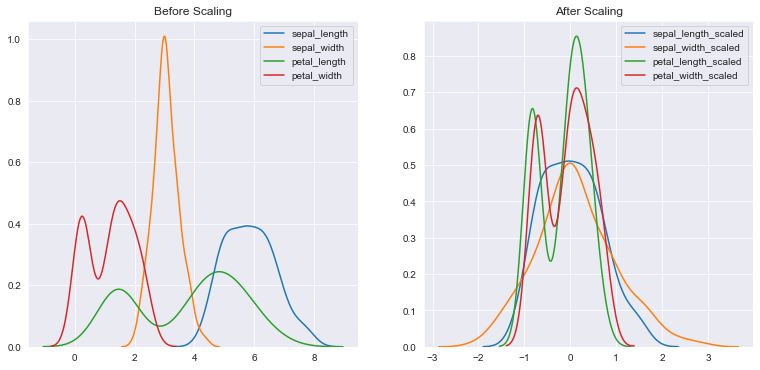

In [10]:
make_plot(data_robust_scaled)

## 5. Phép co dãn tiêu chẩn hóa

Phép co dãn tiêu chuẩn hóa này chuẩn hóa theo từng mẫu (bản ghi) riêng lẻ. Mỗi giá trị của mỗi biến trong bản ghi được chia cho khoảng cách từ gốc tọa độ đến điểm đó. Khoảng cách thường được dùng là: Manhattan (L1) và Euclidean (L2). Sau khi chuẩn hóa khoảng cách mới có giá trị bằng 1.  
Công thức tính:   
$x_j= \frac{x_i}{|x_i| + |y_i| + |z_i|}$  hoặc $x_j= \frac{x_i}{\sqrt{|x_i|^2 + |y_i|^2 + |z_i|^2}}$

### 5.1. Sử dụng khoảng cách Mahattan (L1)

In [11]:
from sklearn.preprocessing import Normalizer
from sklearn.compose import ColumnTransformer

columns= ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
normalize_l1= Normalizer(norm= 'l1')
normalize_l1_transformer= ColumnTransformer(transformers= [('Normalize', normalize_l1, columns)])

data_normalize_l1= normalize_l1_transformer.fit_transform(iris)
data_normalize_l1= pd.DataFrame(data_normalize_l1, columns= [col + '_scaled' for col in columns])
data_normalize_l1= data_normalize_l1.join(iris)

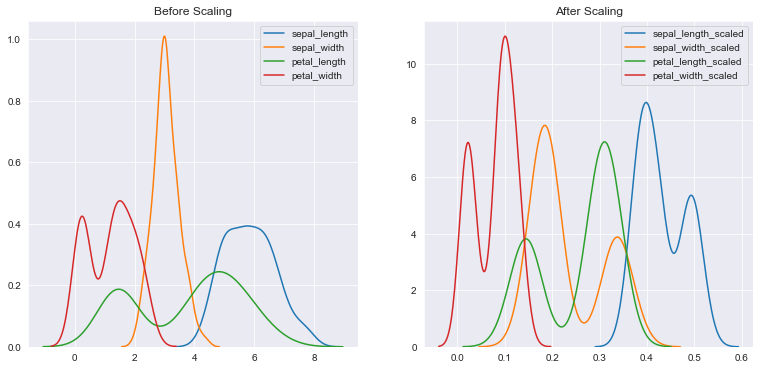

In [12]:
make_plot(data_normalize_l1)

### 5.2. Sử dụng khoảng cách Euclidean (L2)

In [13]:
from sklearn.preprocessing import Normalizer
from sklearn.compose import ColumnTransformer

columns= ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
normalize_l2= Normalizer(norm= 'l2')
normalize_l2_transformer= ColumnTransformer(transformers= [('Normalize', normalize_l2, columns)])

data_normalize_l2= normalize_l2_transformer.fit_transform(iris)
data_normalize_l2= pd.DataFrame(data_normalize_l2, columns= [col + '_scaled' for col in columns])
data_normalize_l2= data_normalize_l2.join(iris)

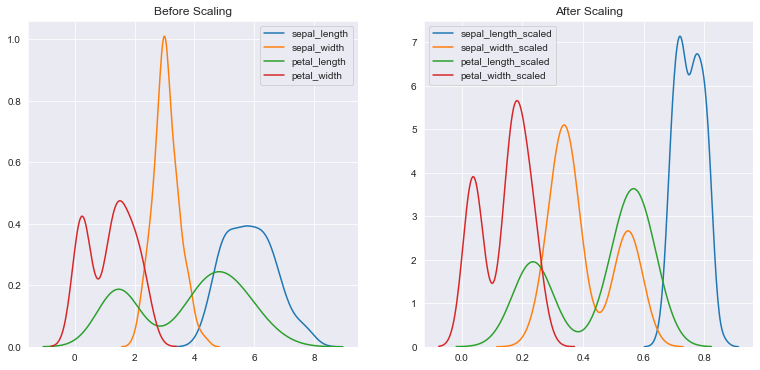

In [14]:
make_plot(data_normalize_l2)

## 6. Tổng kết

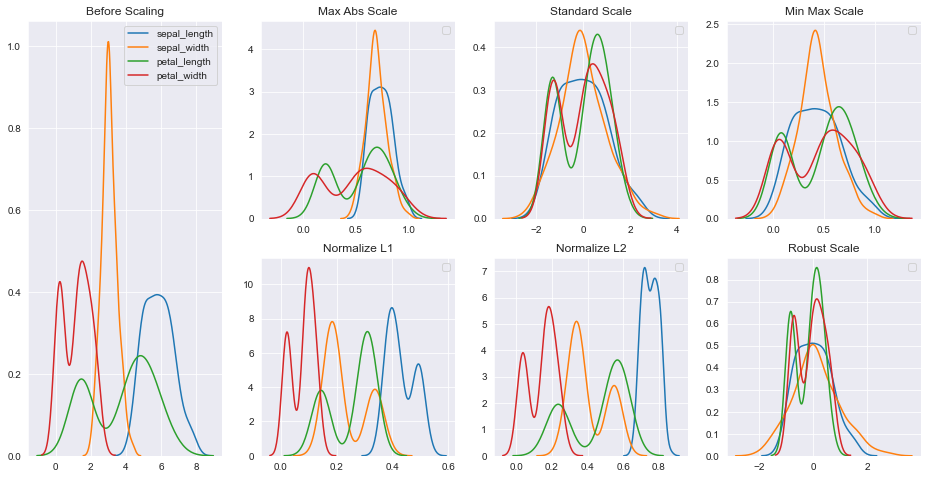

In [15]:
columns= ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
sns.set_style("darkgrid")

fig = plt.figure(figsize= (16, 8))
plt.subplot(1, 4, 1)
plt.title('Before Scaling')
for col in columns:
        sns.kdeplot(iris[col])

plt.subplot(2, 4, 2)
plt.title('Max Abs Scale')
for col in columns:
        sns.kdeplot(data_maxabs_scaled[col + '_scaled'])
plt.legend('')

plt.subplot(2, 4, 3)
plt.title('Standard Scale')
for col in columns:
        sns.kdeplot(data_standard_scaled[col + '_scaled'])
plt.legend('')

plt.subplot(2, 4, 4)
plt.title('Min Max Scale')
for col in columns:
        sns.kdeplot(data_minmax_scaled[col + '_scaled'])
plt.legend('')

plt.subplot(2, 4, 8)
plt.title('Robust Scale')
for col in columns:
        sns.kdeplot(data_robust_scaled[col + '_scaled'])
plt.legend('')
        
plt.subplot(2, 4, 6)
plt.title('Normalize L1')
for col in columns:
        sns.kdeplot(data_normalize_l1[col + '_scaled'])
plt.legend('')
        
plt.subplot(2, 4, 7)
plt.title('Normalize L2')
for col in columns:
        sns.kdeplot(data_normalize_l2[col + '_scaled'])
plt.legend('')